In [1]:
from skimage import data
from skimage.color import rgb2gray

In [2]:
from skimage import img_as_ubyte, img_as_float

gray_images = { "cat": rgb2gray(img_as_float(data.chelsea())),
                "camera":rgb2gray(img_as_float(data.astronaut()))}
                

In [3]:
import numpy as np
from numpy.linalg import svd

In [19]:

def compress_svd(image, k):
    U,s,V = svd(image,full_matrices=False)
    print(len(U.flat))
    print(len(s.flat))
    print(len(V.flat))
    reconst_matrix = np.dot(U[:,:k], np.dot(np.diag(s[:k]),V[:k,:]))
    return reconst_matrix,s

In [24]:
len(gray_images['cat'].flat) *2 
image = gray_images[ 'cat']

In [25]:
U,s,V = svd(image,full_matrices=False)   



In [35]:
factor = 100
UK =  U[:,:factor]
sk = s[:factor]
Vk = V[:factor,:]

In [36]:
reconst_matrix = np.dot(UK,np.dot(np.diag(sk),Vk))

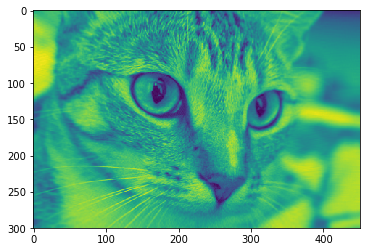

In [37]:
plt.imshow(reconst_matrix)
plt.show()

In [42]:
len(s)

300

In [22]:
rm, sm = compress_svd(gray_images['cat'],100)

90000
300
135300


In [15]:
len(rm.flat) 

135300

In [16]:
import matplotlib.pyplot as plt

def compress_show_gray_images(img_name, k):
    image = gray_images[img_name]
    original_shape = image.shape
    reconst_img, s = compress_svd(image,k)
    fig, axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ration= 100*(k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("Size relative={:.2f}".format(compression_ration)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [17]:
%matplotlib inline

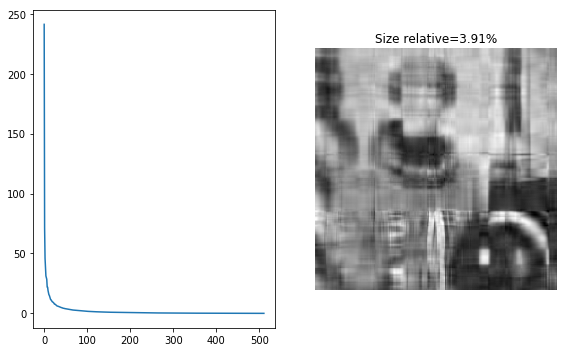

In [18]:
compress_show_gray_images('camera', 10)

In [10]:
interact(compress_show_gray_images,img_name=list(gray_images.key()),k=(1,300));

NameError: name 'interact' is not defined

In [ ]:
import math
import os
import random
import re
import sys
import numpy as np

# Complete the compareTriplets function below.
def compareTriplets(a, b):
   na = np.array(a)
   nb = np.array(b)
   m1 = a-b
   apoints = sum([1 if a >0 else 0 for a in m1])
   bpoints = sum([1 if a <0 else 0 for a in m1])
   return apoints,bpoints
   

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    a = list(map(int, input().rstrip().split()))

    b = list(map(int, input().rstrip().split()))

    result = compareTriplets(a, b)

    fptr.write(' '.join(map(str, result)))
    fptr.write('\n')

    fptr.close()
